 1. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.datasets import make_blobs

2. Generate 2-D data: 3 clean blobs + a handful of outliers

In [2]:
X, _ = make_blobs(n_samples=400, centers=3, cluster_std=0.60,
                  random_state=42)
# sprinkle a few outliers
rng = np.random.RandomState(7)
outliers = rng.uniform(low=-6, high=6, size=(15, 2))
X = np.vstack([X, outliers])

3. Fit a Kernel Density model (Gaussian kernel)

In [3]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.3)
kde.fit(X)

KernelDensity(bandwidth=0.3)

4. Evaluate density on a grid

In [4]:
xgrid, ygrid = np.linspace(-8, 8, 100), np.linspace(-8, 8, 100)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
xy_grid = np.vstack([Xgrid.ravel(), Ygrid.ravel()]).T
log_dens = kde.score_samples(xy_grid)      # log-probability
dens = np.exp(log_dens).reshape(Xgrid.shape)

5. Identify anomalies: lowest-density points

In [5]:
log_dens_points = kde.score_samples(X)
threshold = np.percentile(log_dens_points, 5)   # bottom 5 % are “anomalies”
anomalies = X[log_dens_points < threshold]

6. Visualise density + anomalies

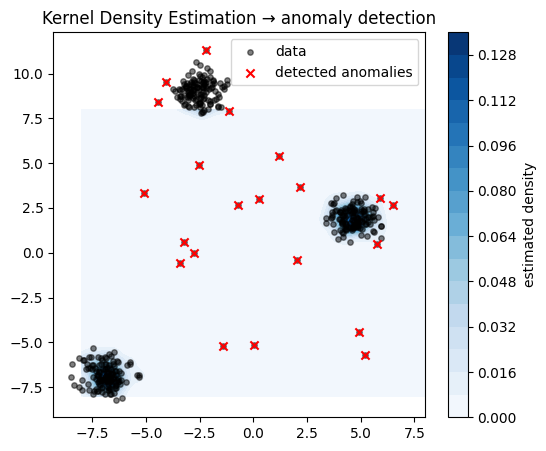

In [6]:
plt.figure(figsize=(6, 5))
plt.contourf(Xgrid, Ygrid, dens, levels=20, cmap='Blues')
plt.colorbar(label='estimated density')
plt.scatter(X[:, 0], X[:, 1], c='k', s=15, alpha=0.5, label='data')
plt.scatter(anomalies[:, 0], anomalies[:, 1],
            c='red', s=35, marker='x', label='detected anomalies')
plt.legend(); plt.title("Kernel Density Estimation → anomaly detection")
plt.show()